In [1]:
import enzope
import numpy as np
from matplotlib import pyplot as plt

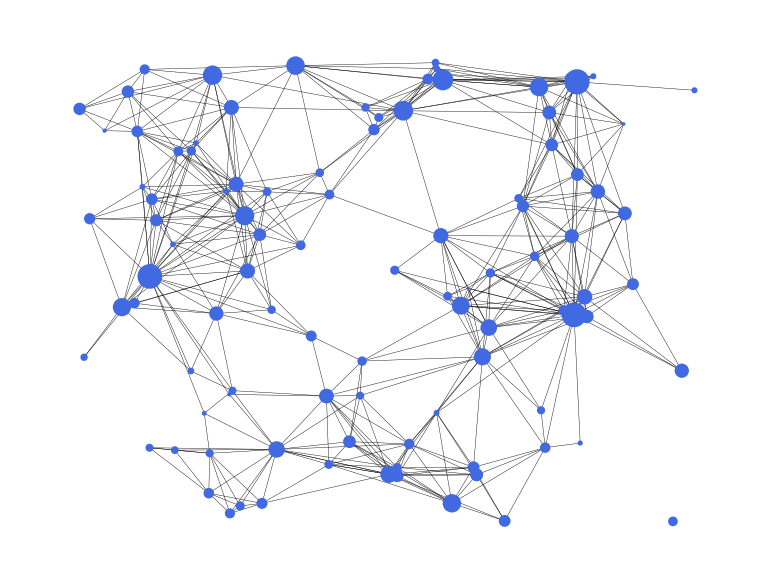

In [2]:
graph = enzope.GTG(n_nodes=100, theta=50, plotable=True)
graph.plot_snapshot()

In [3]:
model = enzope.CPUModel(n_agents=1000, f=.1, measure_every=1)
model.run(steps=1000)

100%|██████████| 1000/1000 [00:08<00:00, 120.85it/s]


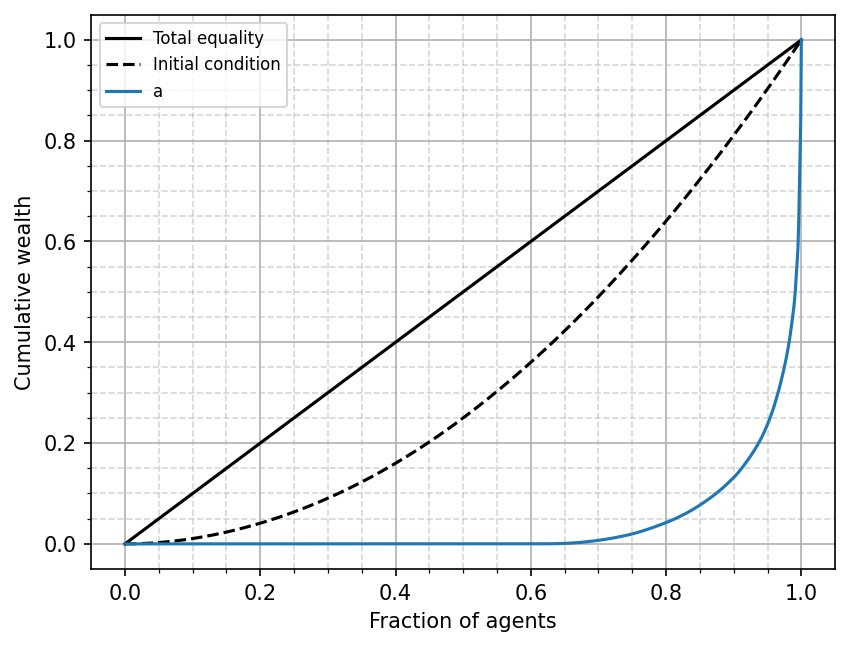

In [5]:
enzope.plot_lorenz_curve([model.w], labels=['a'])

In [7]:
n1 = 300
n2 = 1000
model1 = enzope.CPUModel(n_agents=n1, f=.1, measure_every=1)
model2 = enzope.CPUModel(n_agents=n2, f=.1, measure_every=1)

model1.run(steps=2000)
model2.run(steps=2000)

100%|██████████| 2000/2000 [00:14<00:00, 138.28it/s]


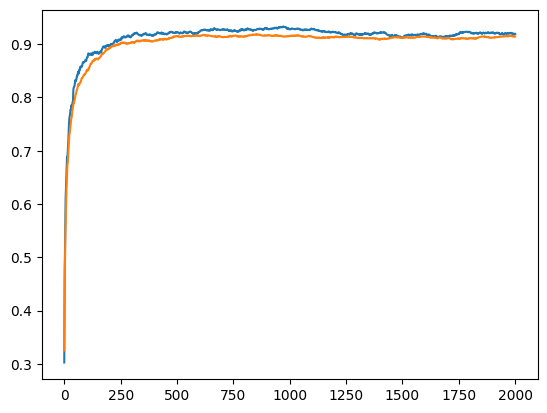

In [8]:
plt.plot(model1.gini)
plt.plot(model2.gini)

In [11]:
model1.info()

--- Model Info ---
Agents: 300
Graph: None
Interaction: <function yard_sale at 0x75b3b4bb18a0>
f: 0.1
w_min: 3e-17
Seed: None
Current Gini: 0.9192
Current Actives: 0.4200
Richest Agent wealth: 0.2543382942676544
------------------


Testing seed

In [10]:
seed = 10
model1 = enzope.CPUModel(n_agents=200, f=.1, measure_every=1, seed=seed)

model1.run(steps=200)

print(model1.gini)

100%|██████████| 200/200 [00:00<00:00, 351.98it/s]

[0.34635543823242176, 0.4158549499511718, 0.4553002166748046, 0.49295578002929674, 0.5201066970825194, 0.5469400024414062, 0.5699898147583007, 0.5792127227783201, 0.5802253341674803, 0.6052311706542968, 0.616242332458496, 0.6289883422851561, 0.6407715606689453, 0.6551530075073242, 0.6739974594116209, 0.6933647727966308, 0.6996101760864257, 0.7078576087951659, 0.706248550415039, 0.7123206329345702, 0.7276489639282225, 0.733464126586914, 0.7344696044921875, 0.7420531272888182, 0.7477027320861815, 0.7514355087280272, 0.7540633583068846, 0.7554214477539062, 0.7567138481140135, 0.7558934020996093, 0.755646743774414, 0.7577518272399901, 0.7596334648132324, 0.7686616897583007, 0.7685609054565429, 0.76811954498291, 0.7655959320068358, 0.7802124977111815, 0.7805712509155273, 0.7812085914611815, 0.7842436599731444, 0.7903347015380858, 0.7943575477600097, 0.7929483222961424, 0.7910475921630858, 0.7965346336364745, 0.794260196685791, 0.7947353172302245, 0.7902511405944823, 0.789828815460205, 0.795

In [36]:
seed = 10
for i in range(10):
    model2 = enzope.CPUModel(n_agents=1000, f=.1, measure_every=1, seed=seed)

    model2.run(steps=1000)

print(model2.gini)

100%|██████████| 1000/1000 [00:08<00:00, 120.44it/s]

[0.33517041015624993, 0.42668896484374985, 0.47794921874999985, 0.5040191040039061, 0.542900177001953, 0.5607689208984374, 0.5868879394531249, 0.6081491699218748, 0.6283307189941405, 0.6431557006835936, 0.655627227783203, 0.663363555908203, 0.6695061950683593, 0.6799704589843749, 0.6913615722656249, 0.6966604003906249, 0.7049969787597655, 0.7089855346679687, 0.7159772338867186, 0.7221773681640624, 0.7300704345703124, 0.7364925842285155, 0.7398070678710936, 0.7436329650878906, 0.7470797271728514, 0.7496121826171873, 0.752775665283203, 0.7592688446044921, 0.7627757720947265, 0.7674794464111327, 0.768947540283203, 0.7688986358642577, 0.7712376556396483, 0.7728838500976561, 0.7745652008056639, 0.7777501525878905, 0.7797991790771484, 0.7809943389892577, 0.7844953002929687, 0.7863617858886718, 0.7883780517578124, 0.7901070556640624, 0.7909211273193358, 0.7948629608154296, 0.7973325958251952, 0.7984056396484374, 0.8019954986572264, 0.8019453735351562, 0.8052521972656249, 0.807588165283203, 0.

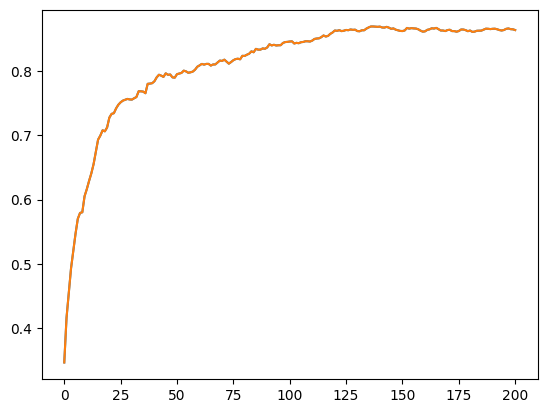

In [12]:
plt.plot(model1.gini)
plt.plot(model2.gini)

Probemos el ensemble

In [2]:
model_params = {
    'n_agents': 1000,
    'f': .1,
    'measure_every': 1
}
ensemble = enzope.CPUEnsemble(n_models=10, model_params=model_params, seed=10)

In [3]:
ensemble.run(1000)

100%|██████████| 1000/1000 [00:07<00:00, 127.30it/s]


In [4]:
means = ensemble.aggregate_results()

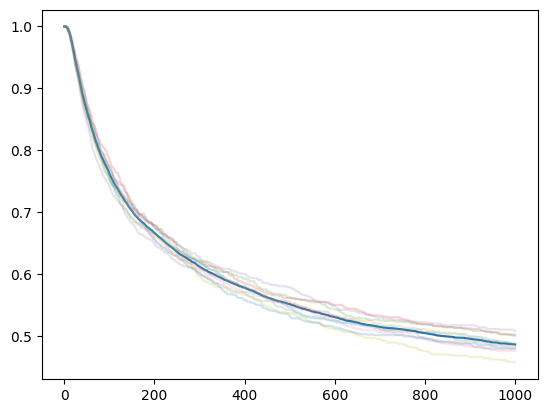

In [8]:
plt.plot(means['mean_n_active'])
for i in range(10):
    plt.plot(ensemble.models[i].n_active, alpha=.2)